In [1]:
import numpy as np
import pickle 
from matplotlib import pyplot as plt
import pandas as pd

def load_model(file_path):
    with open(file_path, 'rb') as f:
        params = pickle.load(f)
    print('Weights and biases loaded from file.')
    return params['W1'], params['b1'], params['W2'], params['b2']

In [2]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def get_predictions(A2):
    return np.argmax(A2, 0)

In [3]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [4]:
def test_prediction(index, W1, b1, W2, b2, X, Y):
    current_image = X[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = Y[index]
    print(f"Prediction: {prediction}, Label: {label}")
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [5]:
W1, b1, W2, b2 = load_model('finetuned_weights.pkl')

data = pd.read_csv('../data/test.csv')
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

Weights and biases loaded from file.


In [ ]:
'''To check finetune.csv'''
'''ONLY RUN IF YOU HAVENT RAN THE PREVIOS ONE!'''
W1, b1, W2, b2 = load_model('weights.pkl')

data = pd.read_csv('../data/finetune.csv', header=None)
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

Y_dev = data[:,0]
X_dev = data[:,1:]
X_dev = X_dev.T

Weights and biases loaded from file.


Prediction: [7], Label: 1


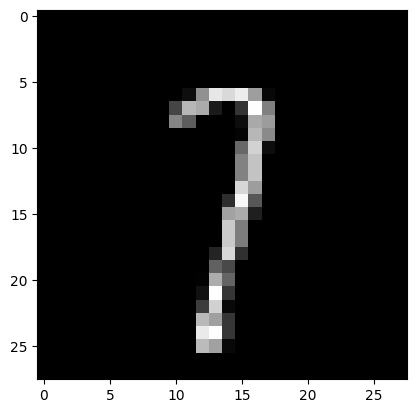

Prediction: [1], Label: 5


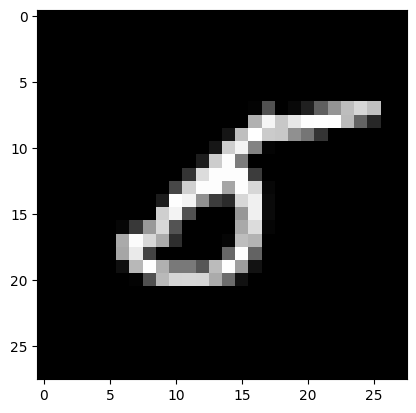

Prediction: [7], Label: 8


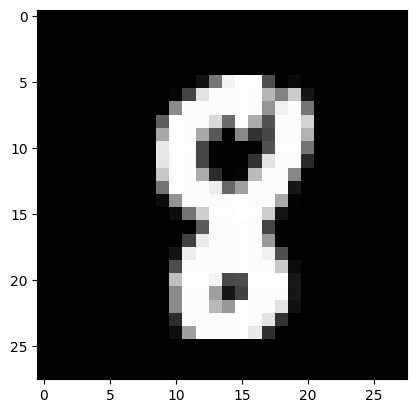

Prediction: [4], Label: 9


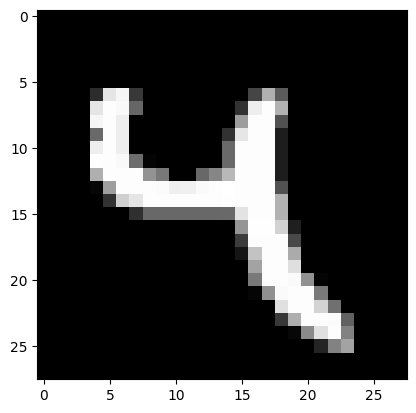

Prediction: [9], Label: 9


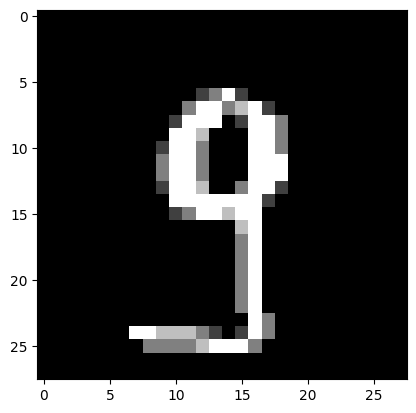

Prediction: [8], Label: 5


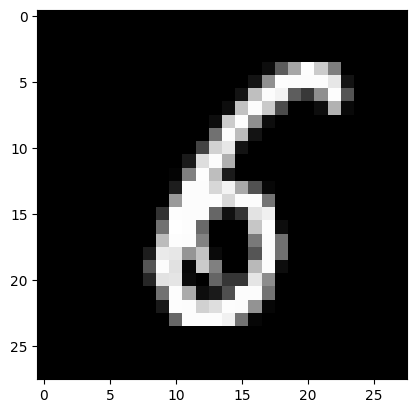

Prediction: [5], Label: 5


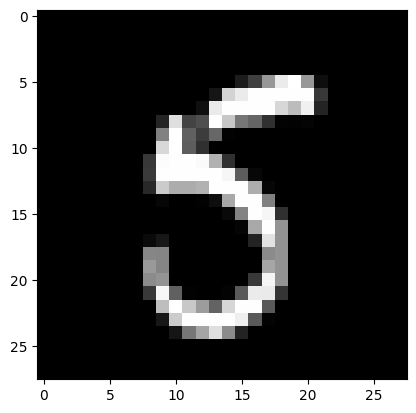

Prediction: [7], Label: 9


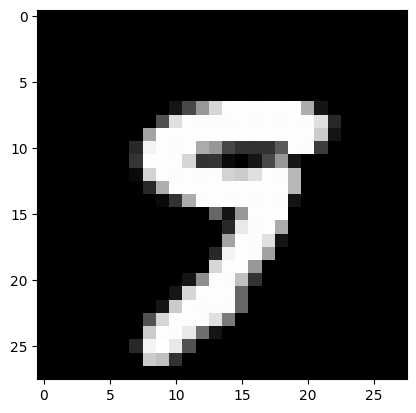

Prediction: [7], Label: 8


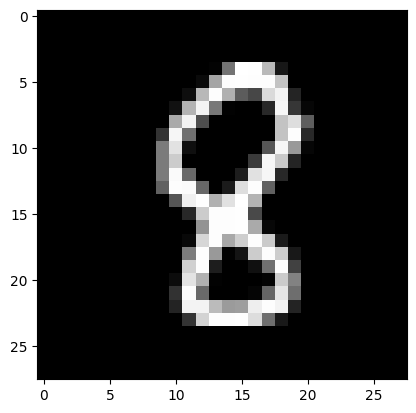

Prediction: [3], Label: 3


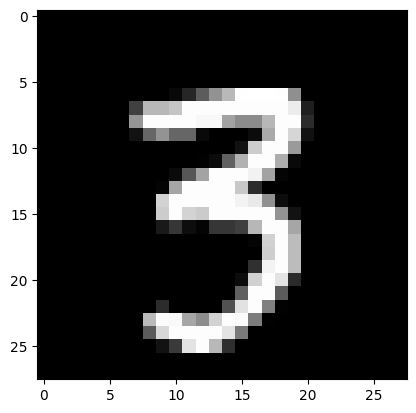

In [7]:
j = 10
for i in range(j, 10+j):    
    test_prediction(i, W1, b1, W2, b2, X_dev, Y_dev)

In [ ]:
'IGNORE BELOW THIS. This was used to update the labels for test.csv'

In [46]:
'''
def test_pred(index, W1, b1, W2, b2, X, Y):
    current_image = X[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = Y[index]
    print(f"Prediction: {prediction}, Label: {label}")
    return prediction
'''

'\ndef test_pred(index, W1, b1, W2, b2, X, Y):\n    current_image = X[:, index, None]\n    prediction = make_predictions(current_image, W1, b1, W2, b2)\n    label = Y[index]\n    print(f"Prediction: {prediction}, Label: {label}")\n    return prediction\n'

In [47]:
'''df = pd.read_csv('./data/test.csv')'''

"df = pd.read_csv('./data/test.csv')"

In [48]:
'''length = len(np.array(df['label']))
dt = np.array(df)
dt_dev = dt[0:].T
X = dt_dev[1:] / 255.0
Y = dt_dev[0]'''

"length = len(np.array(df['label']))\ndt = np.array(df)\ndt_dev = dt[0:].T\nX = dt_dev[1:] / 255.0\nY = dt_dev[0]"

In [49]:
'''for i in range(0, length):
    df.at[i, 'label'] = test_pred(i, W1, b1, W2, b2, X, Y)'''

"for i in range(0, length):\n    df.at[i, 'label'] = test_pred(i, W1, b1, W2, b2, X, Y)"

In [50]:
'''df.to_csv('./data/test.csv', index=False)'''

"df.to_csv('./data/test.csv', index=False)"